# Graphs in ML - TP1 : Spectral clustering
### Dimitri Bouche (dimi.bouche@gmail.com)

## 1. Graph construction

In [51]:
import numpy as np
from helper import *
import numpy as np
import matplotlib.pyplot as pyplot
import scipy.spatial.distance as sd
import sys
import os
from graph_construction.generate_data import *


sys.path.append(os.path.dirname(os.getcwd()))

In [103]:
def build_similarity_graph(X, var=1, eps=0, k=0):
#      Computes the similarity matrix for a given dataset of samples.
#
#  Input
#  X:
#      (n x m) matrix of m-dimensional samples
#  k and eps:
#      controls the main parameter of the graph, the number
#      of neighbours k for k-nn, and the threshold eps for epsilon graphs
#  var:
#      the sigma value for the exponential function, already squared
#
#
#  Output
#  W:
#      (n x n) dimensional matrix representing the adjacency matrix of the graph
#  similarities:
#      (n x n) dimensional matrix containing
#      all the similarities between all points (optional output)

  assert eps + k != 0, "Choose either epsilon graph or k-nn graph"


#################################################################  
#  build full graph 
#  similarities: (n x n) matrix with similarities between       
#  all possible couples of points.
#  The similarity function is d(x,y)=exp(-||x-y||^2/var)
#################################################################
  # euclidean distance squared between points
  dists = sd.squareform(sd.pdist(X))
  similarities = np.exp(-dists / var)
    
#################################################################
#################################################################

  if eps:
#################################################################
#  compute an epsilon graph from the similarities               #
#  for each node x_i, an epsilon graph has weights              #
#  w_ij = d(x_i,x_j) when w_ij > eps, and 0 otherwise           #
#################################################################
    similarities = np.maximum(similarities, eps)
     
    return similarities
    
#################################################################
#################################################################

  if k:
#################################################################
#  compute a k-nn graph from the similarities                   #
#  for each node x_i, a k-nn graph has weights                  #
#  w_ij = d(x_i,x_j) for the k closest nodes to x_i, and 0      #
#  for all the k-n remaining nodes                              #                   
#  Remember to remove self similarity and                       #
#  make the graph undirected                                    #
#################################################################
    # Remove the diagonal (self similarity)
    similarities = np.maximum(similarities, eps) - np.eye(similarities.shape[0])
    wdir = np.zeros(similarities.shape)
    for i in range(0, similarities.shape[0]):
        neighbors_inds = np.argsort(similarities[i, :])[:k]
        wdir[i, neighbors_inds] = similarities[i, neighbors_inds]
    # The matrix is directed, we turn it into the at least k neighbors
    similarities = np.maximum(wdir, wdir.T)
    
    return similarities
    
#################################################################
#################################################################

In [47]:
n_samples = 20
genparam = 1
X, Y = generate_data.worst_case_blob(n_samples, genparam)

In [49]:
X

array([[-0.45715761,  0.34869697],
       [ 0.04990417,  0.13443518],
       [ 0.27088992, -0.06523607],
       [ 0.02485339,  0.54136398],
       [-0.56520999, -0.27321311],
       [-0.45863004,  0.20633567],
       [-0.31169054,  0.05831481],
       [ 0.42774201, -0.34687175],
       [ 0.05259316,  0.18746129],
       [-0.34195612, -0.01149886],
       [ 0.15407021, -0.08210999],
       [ 0.21035133,  0.05908373],
       [ 0.30826945,  0.26648238],
       [ 0.12581278, -0.09247627],
       [ 0.17975333, -0.00670784],
       [ 0.32407742,  0.48360267],
       [-0.42191159,  0.09383844],
       [-0.04534446, -0.14484786],
       [ 0.65960619, -0.25851459],
       [ 1.65960619,  0.        ]])

In [55]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [45]:
def plot_similarity_graph(X, Y):

    #      a skeleton function to analyze the construction of the graph similarity
    #      matrix, needs to be completed

    #################################################################
    #  choose the type of the graph to build and the respective     #
    #  threshold and similarity function options                    #
    #################################################################

    k = 0
    eps = 0.001
    var = 1

    #################################################################
    #################################################################

    #################################################################
    # use the build_similarity_graph function to build the graph W  #
    # W: (n x n) dimensional matrix representing                    #
    #    the adjacency matrix of the graph                          #
    #################################################################

    W = build_similarity_graph(X, var, eps, k)

    #################################################################
    #################################################################

    plot_graph_matrix(X,Y,W)
    
    #################################################################
    #################################################################
    

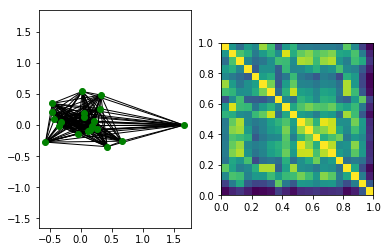

In [48]:
plot_similarity_graph(X, Y)

In [84]:
# Compute the matrix of similarities
num_samples = 100
gen_pam = 1.2
[X, Y] = worst_case_blob(num_samples,gen_pam)
var = 0.3  # exponential_euclidean's sigma^2
dists = sd.squareform(sd.pdist(X))
similarities = np.exp(-dists / var)

In [97]:
print(similarities)

[[1.00000000e+00 3.14864363e-01 6.92317702e-02 ... 1.13004107e-01
  1.20274003e-01 6.66209805e-04]
 [3.14864363e-01 1.00000000e+00 1.11954784e-01 ... 2.56455050e-01
  2.88928927e-01 1.13372366e-03]
 [6.92317702e-02 1.11954784e-01 1.00000000e+00 ... 3.55993385e-02
  4.13611312e-02 1.70753838e-04]
 ...
 [1.13004107e-01 2.56455050e-01 3.55993385e-02 ... 1.00000000e+00
  8.58128222e-01 4.36910282e-03]
 [1.20274003e-01 2.88928927e-01 4.13611312e-02 ... 8.58128222e-01
  1.00000000e+00 3.81672584e-03]
 [6.66209805e-04 1.13372366e-03 1.70753838e-04 ... 4.36910282e-03
  3.81672584e-03 1.00000000e+00]]


In [85]:
# How to chose epsilon
max_tree = max_span_tree(similarities)
a = max_tree * similarities
epsilon =  np.min(a[a != 0])
print(epsilon)

0.01057237940339798


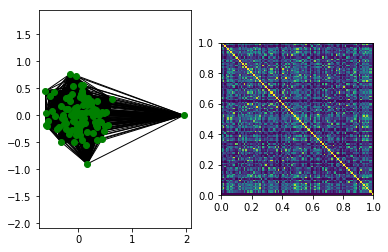

In [86]:
# Test with the optimal epsilon
k = 0
eps = epsilon
W = build_similarity_graph(X, var, eps, k)
plot_graph_matrix(X,Y,W)

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.03655664 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.00113372]


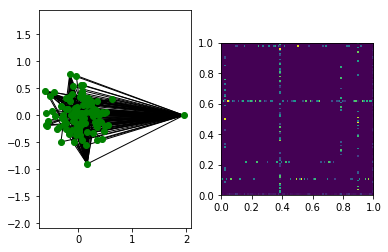

In [109]:
# Test with some k
W = build_similarity_graph(X, var, 0, 3)
print(W[1, :])
plot_graph_matrix(X,Y,W)

In [ ]:
def how_to_choose_epsilon():
#       a skeleton function to analyze the influence of the graph structure
#       on the epsilon graph matrix, needs to be completed


# the number of samples to generate
    num_samples = 100
    
    #################################################################
    # the option necessary for worst_case_blob, try different       #
    # values                                                        #
    #################################################################

    gen_pam =   # read worst_case_blob.m to understand the meaning of
    #                               the parameter

    #################################################################
    #################################################################
    [X, Y] = worst_case_blob(num_samples,gen_pam)
    
    #################################################################
    # use the similarity function and the max_span_tree function    #
    # to build the maximum spanning tree max_tree                   #
    # sigma2: the exponential_euclidean's sigma2 parameter          #
    # similarities: (n x n) matrix with similarities between        #
    #              all possible couples of points                   #
    # max_tree: (n x n) indicator matrix for the edges in           #
    #           the maximum spanning tree                           #
    #################################################################

    var = 1  # exponential_euclidean's sigma^2

    dists = sd.squareform(sd.pdist(X))
    similarities = np.exp(-dists / var) - np.eye(dists.shape[0])
    
    max_tree = max_span_tree(similarities)
    #################################################################
    #################################################################

    #################################################################
    # set graph_thresh to the minimum weight in max_tree            #
    #################################################################

    eps = 
    
    
    #################################################################
    #################################################################


    #################################################################
    # use the build_similarity_graph function to build the graph W  #
    # W: (n x n) dimensional matrix representing                    #
    #    the adjacency matrix of the graph  
    #    use plot_graph_matrix to plot the graph                    #
    #################################################################

 
    #################################################################
    #################################################################
    

# 2. Spectral clustering

In [120]:
D = np.diag(W.sum(axis=0))
Dinv_sqrt = np.diag(1 / np.diag(np.sqrt(D)))

In [ ]:
def build_laplacian(W, laplacian_normalization=""):
#  laplacian_normalization:
#      string selecting which version of the laplacian matrix to construct
#      either 'unn'normalized, 'sym'metric normalization
#      or 'rw' random-walk normalization

#################################################################
# build the laplacian                                           #
# L: (n x n) dimensional matrix representing                    #
#    the Laplacian of the graph                                 #
#################################################################
D = np.diag(W.sum(axis=0))
L = D - W
if laplacian_normalization=="sym":
    Dinv_sqrt = np.diag(1 / np.diag(np.sqrt(D)))


#################################################################
#################################################################


In [ ]:
def spectral_clustering(L, chosen_eig_indices, num_classes=2):
#  Input
#  L:
#      Graph Laplacian (standard or normalized)
#  chosen_eig_indices:
#      indices of eigenvectors to use for clustering
#  num_classes:
#      number of clusters to compute (defaults to 2)
#
#  Output
#  Y:
#      Cluster assignments


    #################################################################
    # compute eigenvectors                                          #
    # U = (n x n) eigenvector matrix                                #
    # E = (n x n) eigenvalue diagonal matrix (sorted)               #
    #################################################################

    [E,U] = 

    #################################################################
    #################################################################

    #################################################################
    # compute the clustering assignment from the eigenvector        #
    # Y = (n x 1) cluster assignments [1,2,...,c]                   #
    #################################################################
    

    Y = 
    
    #################################################################
    #################################################################
    return Y
